## Made by Krish Bansal 23115069

# Handling Imbalanced Datasets with Sampling Techniques

## 1. Libraries and Data Loading

Make sure your ` creditcard.csv ` file is in the same folder as this notebook.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('creditcard.csv')
data.head()

X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Shape: {X_train_scaled.shape}")
print(f"Test Shape: {X_test_scaled.shape}")

Training Shape: (170884, 30)
Test Shape: (113923, 30)


## 2. Balancing the Dataset

Imbalanced data can really throw off our model. In this section, we'll apply different sampling methods to our training set. We'll use the imbalanced-learn library.

In [2]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

# Random Oversampling
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)
print(f"Random Oversampling: {X_train_ros.shape}")

# Random Undersampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)
print(f"Random Undersampling: {X_train_rus.shape}")

# Tomek Links
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)
print(f"Applying Tomek Links: {X_train_tl.shape}")

# SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(f"SMOTE: {X_train_smote.shape}")


Random Oversampling: (341178, 30)
Random Undersampling: (590, 30)
Applying Tomek Links: (170867, 30)
SMOTE: (341178, 30)


### 2.1 Visualizing the Class Distributions

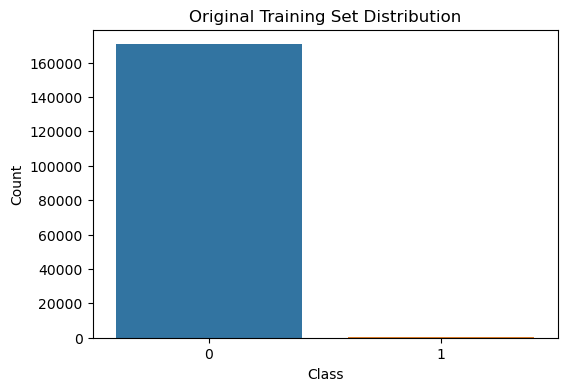

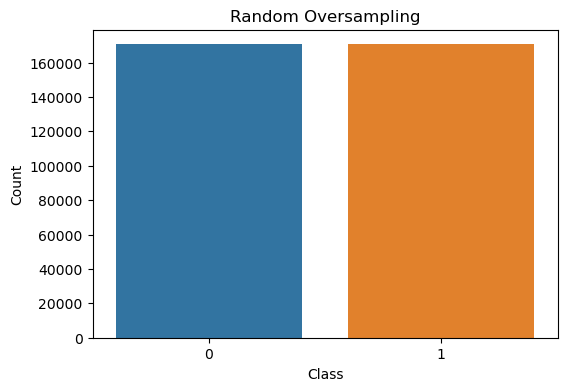

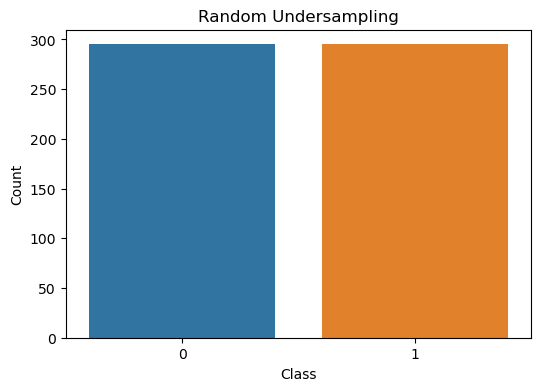

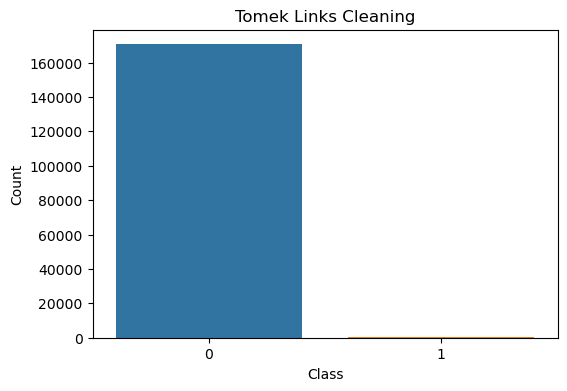

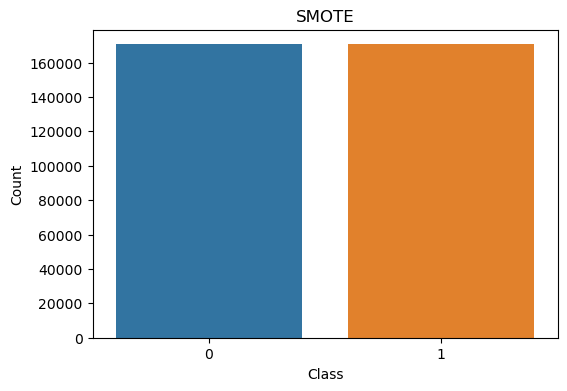

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_class_distribution(labels, title):
    plt.figure(figsize=(6,4))
    sns.countplot(x=labels)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

plot_class_distribution(y_train, "Original Training Set Distribution")
plot_class_distribution(y_train_ros, "Random Oversampling")
plot_class_distribution(y_train_rus, "Random Undersampling")
plot_class_distribution(y_train_tl, "Tomek Links Cleaning")
plot_class_distribution(y_train_smote, "SMOTE")

## 3. Training and Evaluating Our Models

I will evaluate the models using three metrics:

- Accuracy: Overall correctness of predictions (can be misleading on imbalanced data).
- F1 Score: Harmonic mean of precision and recall, great for imbalanced classes.
- AUC: Measures the ability of the model to distinguish between classes.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def train_and_evaluate(X_train_data, y_train_data, X_test_data, y_test_data, model, description="Model"):
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    y_prob = model.predict_proba(X_test_data)[:, 1]
    accuracy = accuracy_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)
    auc = roc_auc_score(y_test_data, y_prob)
    print(f"{description} -> Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}")
    return accuracy, f1, auc


results = {}

# 1. Original imbalanced data
model_orig = DecisionTreeClassifier()
results['Original'] = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, model_orig, "Original Data")

# 2. Random Oversampling
model_ros = DecisionTreeClassifier()
results['Random Oversampling'] = train_and_evaluate(X_train_ros, y_train_ros, X_test_scaled, y_test, model_ros, "Random Oversampling")

# 3. Random Undersampling
model_rus = DecisionTreeClassifier()
results['Random Undersampling'] = train_and_evaluate(X_train_rus, y_train_rus, X_test_scaled, y_test, model_rus, "Random Undersampling")

# 4. Tomek Links
model_tl = DecisionTreeClassifier()
results['Tomek Links'] = train_and_evaluate(X_train_tl, y_train_tl, X_test_scaled, y_test, model_tl, "Tomek Links")

# 5. SMOTE
model_smote = DecisionTreeClassifier()
results['SMOTE'] = train_and_evaluate(X_train_smote, y_train_smote, X_test_scaled, y_test, model_smote, "SMOTE")

# 6. Class Weighting: Adjust model without changing data
model_weighted = DecisionTreeClassifier(class_weight='balanced')
results['Class Weighting'] = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, model_weighted, "Class Weighting")

# Convert our results dictionary into a DataFrame for easy viewing
results_df = pd.DataFrame(results, index=["Accuracy", "F1 Score", "AUC"]).T
print("\nSummary of Model Performance:")
print(results_df)

Original Data -> Accuracy: 0.9991, F1 Score: 0.7494, AUC: 0.8754
Random Oversampling -> Accuracy: 0.9990, F1 Score: 0.7179, AUC: 0.8551
Random Undersampling -> Accuracy: 0.9161, F1 Score: 0.0357, AUC: 0.9073
Tomek Links -> Accuracy: 0.9991, F1 Score: 0.7387, AUC: 0.8729
SMOTE -> Accuracy: 0.9977, F1 Score: 0.5276, AUC: 0.8747
Class Weighting -> Accuracy: 0.9990, F1 Score: 0.7194, AUC: 0.8576

Summary of Model Performance:
                      Accuracy  F1 Score       AUC
Original              0.999131  0.749367  0.875415
Random Oversampling   0.999034  0.717949  0.855097
Random Undersampling  0.916092  0.035711  0.907300
Tomek Links           0.999087  0.738693  0.872859
SMOTE                 0.997674  0.527629  0.874685
Class Weighting       0.999034  0.719388  0.857631


## 4. Comparing Performance with a Plot

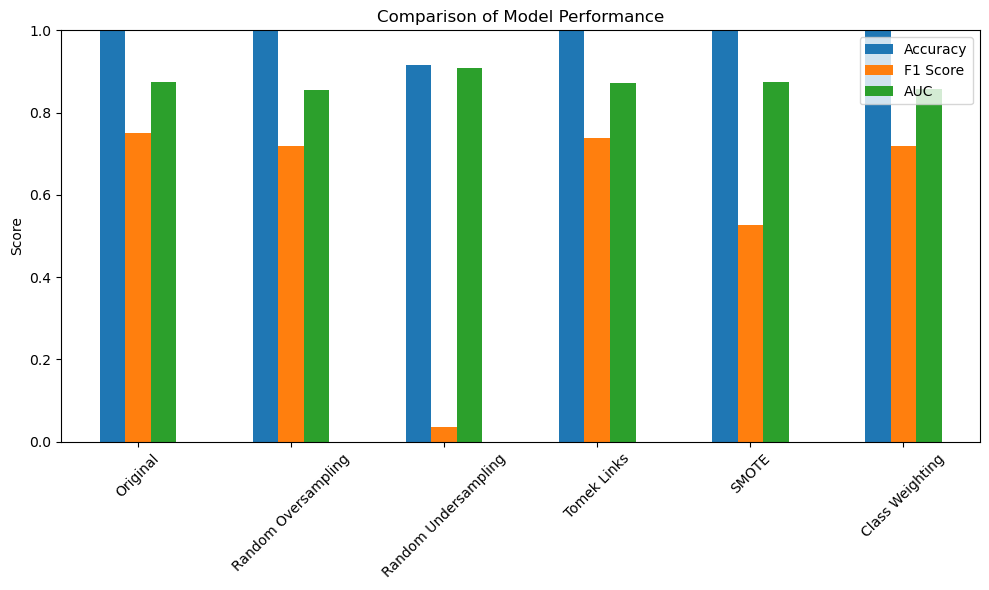

In [5]:
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Thanks for Reading my Code :)